# Predicting Melting Points of Molecules

### Imports

In [1]:
from smdt import datasets
from smdt import molecular_descriptors
from smdt import regression
import pandas as pd

### Data

#### Data Reading

In [2]:
MeltingPoint = datasets.load_MeltingPoint()[:30]

References: Karthikeyan, M.; Glen, R.C.; Bender, A. General melting point prediction based on a diverse compound dataset and artificial neural networks. J. Chem. Inf. Model.; 2005; 45(3); 581-590


#### Calculating Descriptors

In [3]:
data = molecular_descriptors.getAllDescriptors(MeltingPoint)


Calculating Molecular Descriptors...
Row 30 out of 30
Calculating Molecular Descriptors Completed.


#### Data Cleaning

In [4]:
y = data['Target']
X = data.drop(['Target'], axis=1)

In [5]:
from sklearn.preprocessing import Imputer
a = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = a.fit_transform(X)

#### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Models

#### Random Forest

In [16]:
model1, y_pred1 = regression.fit_RandomForestRegressor(X_train, X_test, y_train, y_test, 10)

Training data GridSearchCV best r2 score: 0.07299
Testing Data Regression r2 score: -1.53465


#### Lasso

In [7]:
model2, y_pred2 = regression.fit_Lasso(X_train, X_test, y_train, y_test)

Training data GridSearchCV best r2 score: 0.00000
Testing Data Classification r2 score: -0.57831


#### Ridge

In [8]:
model3, y_pred3 = regression.fit_Ridge(X_train, X_test, y_train, y_test)

Training data GridSearchCV best r2 score: 0.98249
Testing Data Classification r2 score: -5.75430


#### ElasticNet

In [9]:
model4, y_pred4 = regression.fit_ElasticNet(X_train, X_test, y_train, y_test)

Training data GridSearchCV best r2 score: 0.00000
Testing Data Classification r2 score: -0.57831


#### Linear SVR

In [10]:
model5, y_pred5 = regression.fit_LinearSVR(X_train, X_test, y_train, y_test, 100)

Training data GridSearchCV best r2 score: -100.36565
Testing Data Classification r2 score: -17.25263


In [12]:
models = ['Lasso', 'Ridge', 'Random Forest Classifier', 'SGD Classifier']
y_pred = [y_pred2,y_pred3,y_pred4,y_pred5]

In [20]:
models = ['Random Forest', 'Lasso', 'Ridge', 'Random Forest Classifier', 'SGD Classifier']
y_pred = [y_pred1,y_pred2,y_pred3,y_pred4,y_pred5]

In [13]:
from smdt import metrics

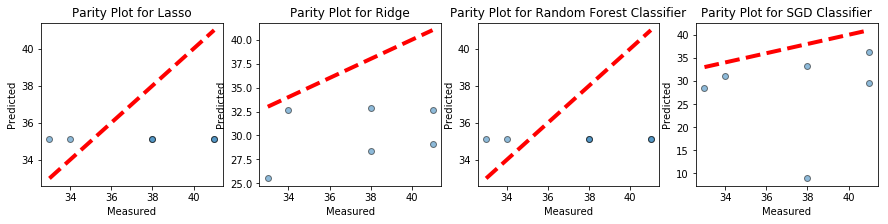

In [14]:
metrics.plot_parity(models, y_pred, y_test)